# Exercise session 9: Recurrent Neural Networks

In this notebook you will be presented with:
1. Ring Network (hand-designed connectivity)
2. Context-dependent Network (learned connectivity)

In [1]:
!mkdir utils_ex9
!mkdir -p utils_exp/rnn_data

!wget -P utils_ex9/ https://github.com/ManteLab/Iton_notebooks_public/raw/refs/heads/main/utils_ex9/utils_ex9.py
!wget -P utils_ex9/ https://github.com/ManteLab/Iton_notebooks_public/raw/refs/heads/main/utils_ex9/utils_ctx.py
!wget -P utils_ex9/ https://github.com/ManteLab/Iton_notebooks_public/raw/refs/heads/main/utils_ex9/show_network.png

!wget -P utils_ex9/rnn_data/ https://github.com/ManteLab/Iton_notebooks_public/raw/refs/heads/main/utils_ex9/rnn_data/rnn_weights.npz
!wget -P utils_ex9/rnn_data/ https://github.com/ManteLab/Iton_notebooks_public/raw/refs/heads/main/utils_ex9/rnn_data/trial_data.npz

from utils_ex9.utils_ex9 import *
from utils_ex9.utils_ctx import *

## Part I. Ring Network (hand-designed connectivity) <a class="anchor" id="rnn_ring"></a>

In this notebook we implement a ring network in a rate-based framework. This model was implemented in [Ben-Yishai et al PNAS 1995 - Theory of orientation tuning in visual cortex.](https://www.pnas.org/doi/10.1073/pnas.92.9.3844)

We first model the inputs which depend on the orientation of visual stimuli. As described by Hubel and Wiesel, a neuron can respond preferentially to a visual stimulus of a certain orientation $\theta_0$, where $\theta_0$ is the orientation of a bar expressed in radians. It is thought that neurons from the visual cortex receive tuned inputs from the thalamus (i.e., the external inputs to the network). The magnitude of these inputs $h_i^{\text{ext}}$ is proportional, for a given neuron, to the difference between its preferred orientation $\theta_i$ and the orientation of the stimuli $\theta_0$:



\begin{align*}
  h_{i}^{ext}(\theta_0) = c[(1-\epsilon) + \epsilon cos(2(\theta_i-\theta_0))]\\
\end{align*}

where $c$ represents the contrast of the stimuli and $\epsilon$ controls the selectivity of the input.

The inputs to the neurons are non-linearly filtered given an activation function $g$. The function is defined by:
    

\begin{align*}
    g(h) = 
    \begin{cases} 
      0 & \text{if } h \leq T \\
      \beta(h - T) & \text{if } T < h \leq T + 1/\beta \\
      1 & \text{if } h > T + 1/\beta
    \end{cases}
\end{align*}

The rate-based neuron model is described by
\begin{align*}
  \tau \frac{dm_i}{dt} = -m_i + g(h_i(\theta_0))\\
\end{align*}

where $m_i$ stands for the activity of neuron $i$, $\tau$ is a time-constant, $g$ is the non-linear function and $h_i$ is the input to neuron $i$.


## 3. Changing the stimulus strength in the absence of Jij connectivity <a class="anchor" id="stim_strength_wocon"></a>

We are working with the simplest scenario for orientation tuning. This scenario corresponds to the case where the only source of input is the thalamus, i.e. there is no connection between neuron (Jij = 0).

**Assignment 1** What do you observe as you increase the stimulus strength “c“?


In [ ]:
change_input_strength_no_connectivity()

## 4. Changing the stimulus strength in the presence of connectivity Jij <a class="anchor" id="stim_strength_wcon"></a>

Next we add connections within the neurons. The connection between two neurons depends on their tuning in the following way:

\begin{align*}
J_{ij} = -J_0 + J_2 \cos(2(\theta_i - \theta_j))
\end{align*}

With the recurrent connections, the input to the neurons becomes:

\begin{align*}
    h_i(\theta_0) = \sum_{j=1}^{N} J_{ij} m_j + h_i^{\text{ext}}(\theta_0)
\end{align*}

**Assignment 2** What do you observe as you increase the stimulus strength “c“ in the presence of recurrent connections?


In [ ]:
change_input_strength_with_connectivity()

## 5. Changing the stimulus orientation <a class="anchor" id="change_stim_wcon"></a>

Run the network for 30 iterations with $\theta_0 = 0$. Use the last vector of activity as the initial activity for another simulation and change $\theta_0$ to $\theta_0 = 2\pi/3$. Run this simulation for 500 iterations. 

In [ ]:
change_input_orientation_with_connectivity()

**Assignment 3** How does the network activity change when we change the stimulus orientation?


Redo the previous experiment, but now in the absence of recurrent connections.

\begin{align*}
  J0 = 0\\
  J1 = 0
\end{align*}

In [ ]:
change_input_orientation_without_connectivity()

# make c go to 0? otherwise not a big reason for the slider

**Assignment 4** In the absence of recurrent connections, how does the network activity change when we change stimulus orientation?


## 6. Remove the stimulus in the presence of recurrent connections <a class="anchor" id="remove_stim"></a>

In [ ]:
remove_stimulus_with_connectivity()

**Assignment 5** How does the network activity change when we remove the stimulus?


In [ ]:
remove_stimulus_without_connectivity()

**Assignment 6** In the absence of recurrent connection, how does the network activity change when we remove the stimulus?


After removing the inputs, the bump is still there. We observe sustained activity. This can only happen if the recurrent weights J are strong enough to form a bistable system, i.e. a system with two stable fixed points.

## Part II. Context-dependent network <a class="anchor" id="rnn_ring"></a>

The Context-dependent RNN was introduced in Lecture 9. The RNN receives two noisy, sensory inputs (between -1 and 1) and two static, context inputs (0 or 1). The network is trained to select one of the two sensory inputs (depending on the currently active context input; i.e. select motion input in motion context) and integrate it over time. The network should reach choice 1 or choice 2 if the average of the contextually relevant sensory input is positive or negative, respectively.

In this exercise you will give different types of inputs to the network and observe the effect of the relevant and irrelevant input to different dimensions. We will analyze five dimensions shown in the figure above. N is the number of hidden units (100 in this case). The five dimensions are the input weights through which the motion input [N x 1], the color input [N x 1], the motion context [N X 1] and the color context [N x 1]; and the output weights through which the activity of the hidden neurons is transformed into a binary choice [N x 1]. 

We will analyze projections along these 5 dimensions. If $\mathbf{X}$ is the activity of the hidden units with dimensionality $N \times T$, then the projection along the motion input weights  $\mathbf{W_{motion}}$ of dimensionality $N \times 1$ will be  $\mathbf{Y} = \mathbf{X}^T\mathbf{W}$ of dimensionality $T \times 1$.

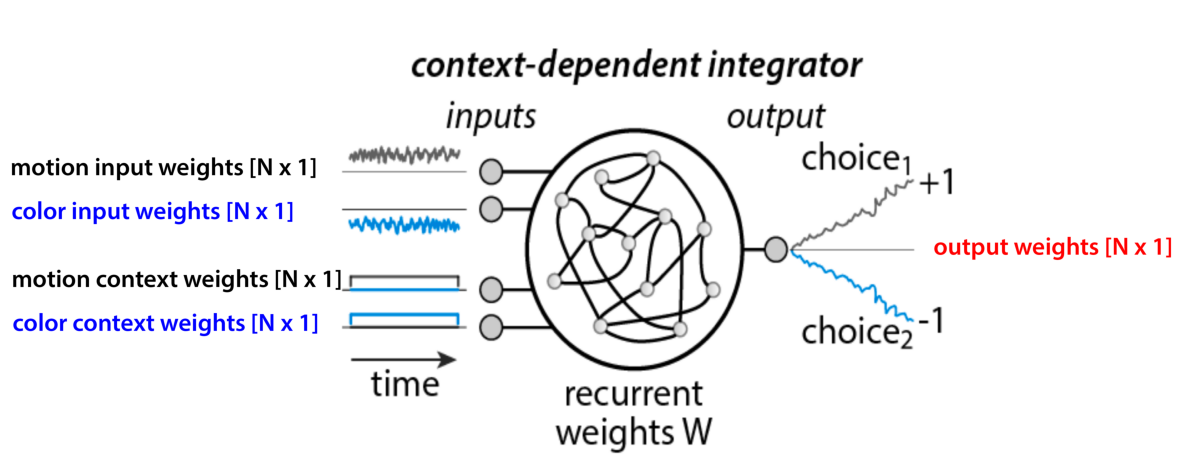

In [2]:
show_network()

Input type: You can choose the input to the network
- Gaussian Input, where at each time-step a random draw from a Gaussian is sampled. If after T = 1400 time-steps, more samples are positive than negative, then the network will choose choice +1. Otherwise it will choose choice -1
- Pulse Input, where at a few time-steps the network receives an input with amplitude 1 and all other time-steps the network receives no input (amplitude = 0)

Choice: Here you can change the sign of the input
- For Gaussian Input with Choice = +1 choice 1, you can select that the majority of Gaussian samples are positive. Alternatively, for Choice = -1 choice 1, you can select that the majority of Gaussian samples are negative.
- For Pulse Input, you select whether the amplitude of pulses is +1 (Choice = +1 choice 1) or -1 (Choice = -1 choice 2)

Context: Here you determine which input should the network integrate
- For “motion context“, the network will integrate the motion input and for “color context“, the network will integrate the color input

Add noise: Here you can add noise to each hidden unit, at each time-step. Noise here reffers to draw a random sample from a Gaussian distribution with mean 0 and standard deviation 0.1.

The purple dot in 2-d projections marks the start of the trial (Time = 1).

In [3]:
generate_rnn_data()

**Assignment 7** For gaussian input, motion context, Choice = +1 choice 1, which choice is selected? See plot 'projection onto output weights'.

**Assignment 8** What happens if you change the context to color context?

**Assignment 9** For pulse input, motion context, Choice = +1 choice 1, which choice is selected? See plot 'projection onto output weights'.

**Assignment 10** How does the time-course of the output projection compare between case #1 gaussian input, motion context, Choice = +1 choice 1 vs. case #2 pulse input, motion context, Choice = +1 choice 1?

**Assignment 10** For pulse input, motion context, choose Choice = -1 choice 2. What changes?

**Assignment 11** Change the context to color context. What is reflected along the output projection?

**Assignment 12** Go back to pulse input, motion context, choose Choice = -1 choice 2 and add noise to the hidden units. How does the projection along the output dimension change?

**Assignment 13** The 2-d projections plot shows the projection along the context weights against the projection along the output weights. How do the trajectories evolve for some of the settings above?  


